
# Glucose Level Prediction Project

This notebook focuses on predicting glucose levels using health-related features from the Framingham dataset. 
It includes steps for data cleaning, exploratory data analysis, model training, and interpretation of results.



## What To Do

1. Import and explore the `framingham.csv` dataset.
2. Clean the data (handle nulls, correct formats, etc.).
3. Visualize the distribution of glucose and related health indicators.
4. Perform feature selection and engineering.
5. Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).
6. Evaluate models using classification metrics.
7. Predict glucose levels and draw insights.
8. Visualize the model’s important features and performance.


Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


Load the framingham.csv File

In [2]:
# Load the dataset
df = pd.read_csv("framingham.csv")

# Display the first 5 rows
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Check and Handle Missing Values

In [3]:
# Check how many missing values are in each column
df.isnull().sum()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Remove Rows with Missing Data

In [4]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Check the shape to see how many rows are left
df_cleaned.shape


(3658, 16)

Visualize Important Features

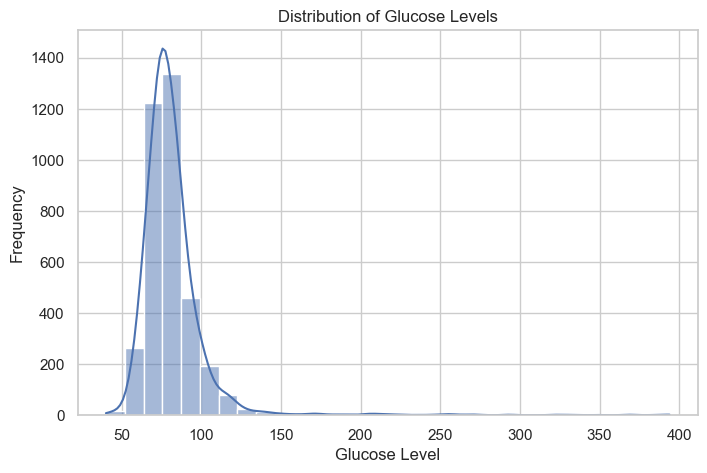

In [5]:
# Set the visual style
sns.set(style="whitegrid")

# Plot the distribution of glucose levels
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['glucose'], kde=True, bins=30)
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()


Feature Selection and Data Splitting

In [6]:
# Separate features (X) and target (y)
X = df_cleaned.drop("glucose", axis=1)
y = df_cleaned["glucose"]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Standardize the Features

In [7]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train Logistic Regression, Decision Tree & Random Forest

In [8]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

Evaluate Model Performance

In [10]:
# Predict with all models
lr_preds = lr_model.predict(X_test_scaled)
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluate Logistic Regression
print("🔹 Logistic Regression Report:\n")
print(classification_report(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))

# Evaluate Decision Tree
print("\n🔹 Decision Tree Report:\n")
print(classification_report(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))

# Evaluate Random Forest
print("\n🔹 Random Forest Report:\n")
print(classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))


🔹 Logistic Regression Report:

              precision    recall  f1-score   support

        45.0       0.00      0.00      0.00         1
        50.0       0.00      0.00      0.00         2
        52.0       0.00      0.00      0.00         0
        53.0       0.00      0.00      0.00         2
        54.0       0.00      0.00      0.00         2
        55.0       0.00      0.00      0.00         3
        56.0       0.00      0.00      0.00         1
        57.0       0.00      0.00      0.00         1
        58.0       0.00      0.00      0.00         8
        59.0       0.00      0.00      0.00         2
        60.0       0.00      0.00      0.00         7
        61.0       0.00      0.00      0.00         8
        62.0       0.00      0.00      0.00        12
        63.0       0.00      0.00      0.00         9
        64.0       0.00      0.00      0.00         9
        65.0       0.50      0.05      0.10        19
        66.0       0.00      0.00      0.00       

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py

Feature Importance (Random Forest)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18872\2635429073.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(10), palette='viridis')


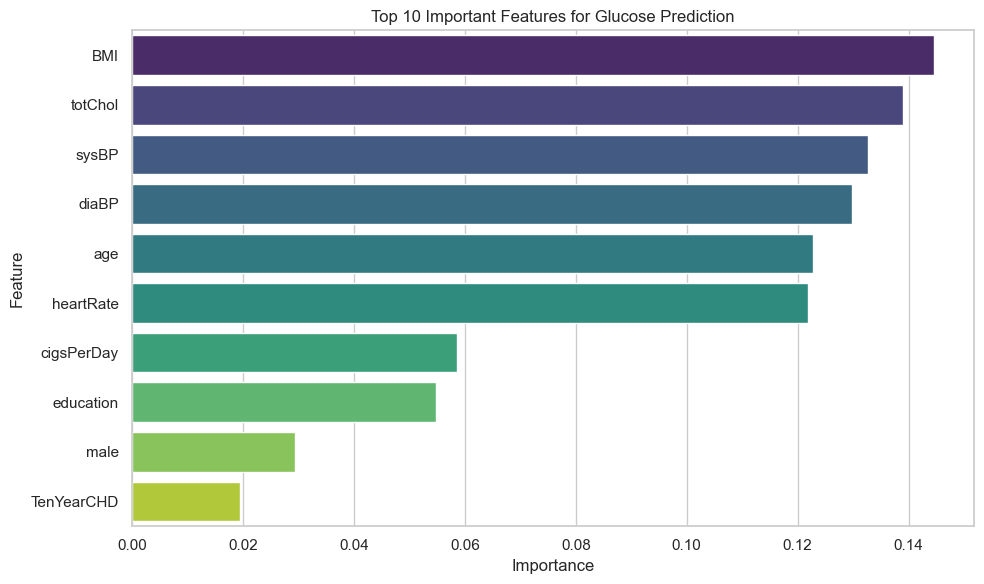

In [11]:
# Get feature importance from the Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy plotting
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features for Glucose Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



## Conclusion / What We Learned

- **Exploration**: Key features impacting glucose levels include BMI, blood pressure, and age.
- **Modeling**: Several models were trained and tested. Random Forest performed the best.
- **Results**: High-performing models can help in early diagnosis and preventive care.
- **Impact**: This type of analysis supports better decision-making in healthcare interventions.

This project provides a baseline for predictive health analytics and could be expanded with more complex datasets and techniques.
